## Load Data

In [ ]:
import pandas as pd


group_wiki_info_path = './data/group_info_from_2000.csv'
artist_data_path = './data/spotify_artist_data.csv'
track_detail_data_path = './data/spotify_track_detail_data.csv'
albums_data_dir = './data/albums'
tracks_data_dir = './data/album_tracks'

In [238]:
group_wiki_df = pd.read_csv(group_wiki_info_path)
group_wiki_df.head()

,start_year,group,wiki_url,decade,group_wiki_name,bg_start_year,bg_end_year,bg_company,bg_hanja,bg_hangul,bg_members
0,2000,Chakra,https://en.wikipedia.org/wiki/Chakra_(group),2000s,Chakra_(group),2000.0,2006.0,NaN,NaN,NaN,"['Hwangbo', 'Bona', 'Eun', 'Ryeowon', 'Eani']"
1,2000,Papaya,https://en.wikipedia.org/wiki/Papaya_(group),2000s,Papaya_(group),2000.0,NaN,NaN,NaN,NaN,"['Kang Kyoung-ah', 'Joo Yeun-jung', 'Cho Hye-k..."
2,2000,UN,https://en.wikipedia.org/wiki/UN_(band),2000s,UN_(band),2000.0,2005.0,NH Planning,NaN,NaN,[]
3,2001,5tion,https://en.wikipedia.org/wiki/5tion,2000s,5tion,2001.0,NaN,NaN,NaN,NaN,"['Il Kwon', 'Chang Woo', 'Ju Ho', 'Jun Young',..."
4,2001,Jewelry,https://en.wikipedia.org/wiki/Jewelry_(group),2000s,Jewelry_(group),2001.0,NaN,Star Empire,NaN,NaN,"['Kim Ye-won', 'Baby J', 'Kim Eunjung', 'Jung ..."


In [239]:
group_wiki_df['bg_company'].dropna().drop_duplicates().tolist()

['NH Planning',
 'Star Empire',
 'SM',
 'SM Entertainment',
 'SidusHQ',
 'Music&NEW',
 'JYP Entertainment',
 "Toy's Factory",
 'CI Entertainment',
 'Star Empire Entertainment',
 'DSP Media',
 'NH Media',
 'CI',
 'Donuts Culture',
 'YG',
 'Nega Network',
 'Mnet',
 'TS Entertainment',
 'DR Music',
 'Core Contents Media',
 'FNC',
 'DSP',
 'JYP',
 'Big Hit',
 'Core Contents',
 'Brand New Music',
 'Cube',
 'Pledis',
 'Around Us',
 'Konvict Muzik',
 'J. Tune Camp',
 'TS',
 'MBK',
 'Fluxus Music',
 'Tunes Tracks/e-SUM',
 'Dream T',
 'Woollim',
 'C-JeS',
 'StarKim Entertainment',
 'AQ',
 'Magic Strawberry Sound',
 'Amoeba Culture',
 'Starship',
 'TOP Media',
 'Open World',
 'Wellmade Yedang',
 'Golden Goose Entertainment',
 'IST',
 'WM',
 'KQ Entertainment',
 'Brave',
 'N.A.P Entertainment',
 'Universal Music',
 'Dreamcatcher Company',
 'Rainbow Bridge World',
 'YM3D',
 'DR',
 'Brave Entertainment',
 'Yedang',
 'Chrome',
 'Amuse Korea',
 'Stardom Entertainment',
 'Banana Culture',
 'Kakao M',


In [ ]:
import re


def standardize_company_name(name, suffixes=None):
    """
    Standardize company names by removing user-defined suffixes like 'Entertainment', 'Music', etc.
    
    Args:
        name (str): The original company name.
        suffixes (list[str]): A list of suffixes to remove. Default is an empty list.
    
    Returns:
        str: Standardized company name.
    """
    if not isinstance(name, str):
        return name #If it is not a string, return it directly
    
    if suffixes is None:
        suffixes = [] # Default is empty list
    
    # Create a regular expression to match suffixes
    suffix_pattern = r'\b(?:' + '|'.join(re.escape(suffix) for suffix in suffixes) + r')\b'
    
    # Remove suffixes and extra whitespace
    standardized_name = re.sub(suffix_pattern, '', name).strip()
    
    # Replace extra spaces with single spaces
    standardized_name = re.sub(r'\s+', ' ', standardized_name)
    
    return standardized_name

# Test function
company_names = [
    "SM Entertainment", "Star Empire Entertainment", "JYP Music",
    "Big Hit Label", "Cube Records", "SM", "Star Empire", "YG Production"
]

# Use parameters to specify the suffix
suffixes_to_remove = ['Entertainment', 'Music', 'Records', 'Production', 'Label', 'Studio']
standardized_names = [standardize_company_name(name, suffixes_to_remove) for name in company_names]

# show results
print("Original:", company_names)
print("Standardized:", standardized_names)

Original: ['SM Entertainment', 'Star Empire Entertainment', 'JYP Music', 'Big Hit Label', 'Cube Records', 'SM', 'Star Empire', 'YG Production']
Standardized: ['SM', 'Star Empire', 'JYP', 'Big Hit', 'Cube', 'SM', 'Star Empire', 'YG']


In [241]:
group_wiki_df['bg_company_standardized'] = group_wiki_df['bg_company'].apply(
    lambda x: standardize_company_name(x, suffixes_to_remove)
)
group_wiki_df['bg_company_standardized'].dropna().drop_duplicates().tolist()

['NH Planning',
 'Star Empire',
 'SM',
 'SidusHQ',
 '&NEW',
 'JYP',
 "Toy's Factory",
 'CI',
 'DSP Media',
 'NH Media',
 'Donuts Culture',
 'YG',
 'Nega Network',
 'Mnet',
 'TS',
 'DR',
 'Core Contents Media',
 'FNC',
 'DSP',
 'Big Hit',
 'Core Contents',
 'Brand New',
 'Cube',
 'Pledis',
 'Around Us',
 'Konvict Muzik',
 'J. Tune Camp',
 'MBK',
 'Fluxus',
 'Tunes Tracks/e-SUM',
 'Dream T',
 'Woollim',
 'C-JeS',
 'StarKim',
 'AQ',
 'Magic Strawberry Sound',
 'Amoeba Culture',
 'Starship',
 'TOP Media',
 'Open World',
 'Wellmade Yedang',
 'Golden Goose',
 'IST',
 'WM',
 'KQ',
 'Brave',
 'N.A.P',
 'Universal',
 'Dreamcatcher Company',
 'Rainbow Bridge World',
 'YM3D',
 'Yedang',
 'Chrome',
 'Amuse Korea',
 'Stardom',
 'Banana Culture',
 'Kakao M',
 'Source',
 'Fantagio',
 'CJ E&M',
 'Sony Korea',
 'Vitamin',
 'LOEN',
 'Jellyfish',
 'Polaris',
 'KT',
 'EMI Japan',
 'Apple of the Eye',
 'Sony',
 'Jungle',
 'Teichiku',
 'Interpark Plus',
 'RBW',
 'Cre.ker',
 'Dreamcatcher',
 'Baljunso',
 'SS

In [ ]:
def map_to_parent_company(name, mapping, suffixes=None):
    """
    Map company names to their parent company based on a predefined mapping.
    
    Args:
        name (str): The company name to standardize.
        mapping (dict): A dictionary mapping parent companies to their subsidiaries (case-insensitive).
        suffixes (list[str]): A list of suffixes to ignore during mapping. Default is an empty list.
    
    Returns:
        str: The standardized parent company name.
    """
    if not isinstance(name, str):
        return name #If it is not a string, return it directly
    
    # Convert the name to lowercase and remove the suffix
    standardized_name = name.lower()
    
    if suffixes:
        for suffix in suffixes:
            if standardized_name.endswith(suffix.lower()):
                standardized_name = standardized_name[: -len(suffix)].strip()
                break # If the suffix is ​​removed, stop the loop directly
    
    # Compare in mapping
    for parent, subsidiaries in mapping.items():
        if standardized_name in [sub.lower() for sub in subsidiaries]:
            return parent # Return the parent company name
    
    return name # If the corresponding name cannot be found, return the original name


parent_company_mapping = {
    "HYBE": [
        "bighit music", "belift lab", "source music", 
        "pledis", "koz entertainment", "hybe labels japan", 
        "ador", "naeco", "hybe umg", "big hit"
    ],
    "Starship": [
        'STARSHIP X', 'Highline', 'Shownote'
    ],
    "Sony Music": [
        'Sony Music Japan', 'Sony Music Korea', 'Sony Japan', 'Sony Korea'
    ],
    "Universal Music": [
        'Universal Japan', 'Universal Korea'
    ]
}
suffixes_to_ignore = ['entertainment', 'music', 'labels', 'studio', 'production', 'records']
group_wiki_df['bg_company_standardized'] = group_wiki_df['bg_company_standardized'].apply(
    lambda x: map_to_parent_company(x, parent_company_mapping, suffixes_to_ignore)
)
group_wiki_df['bg_company_standardized'].dropna().drop_duplicates().tolist()

['NH Planning',
 'Star Empire',
 'SM',
 'SidusHQ',
 '&NEW',
 'JYP',
 "Toy's Factory",
 'CI',
 'DSP Media',
 'NH Media',
 'Donuts Culture',
 'YG',
 'Nega Network',
 'Mnet',
 'TS',
 'DR',
 'Core Contents Media',
 'FNC',
 'DSP',
 'HYBE',
 'Core Contents',
 'Brand New',
 'Cube',
 'Around Us',
 'Konvict Muzik',
 'J. Tune Camp',
 'MBK',
 'Fluxus',
 'Tunes Tracks/e-SUM',
 'Dream T',
 'Woollim',
 'C-JeS',
 'StarKim',
 'AQ',
 'Magic Strawberry Sound',
 'Amoeba Culture',
 'Starship',
 'TOP Media',
 'Open World',
 'Wellmade Yedang',
 'Golden Goose',
 'IST',
 'WM',
 'KQ',
 'Brave',
 'N.A.P',
 'Universal',
 'Dreamcatcher Company',
 'Rainbow Bridge World',
 'YM3D',
 'Yedang',
 'Chrome',
 'Amuse Korea',
 'Stardom',
 'Banana Culture',
 'Kakao M',
 'Source',
 'Fantagio',
 'CJ E&M',
 'Sony Music',
 'Vitamin',
 'LOEN',
 'Jellyfish',
 'Polaris',
 'KT',
 'EMI Japan',
 'Apple of the Eye',
 'Sony',
 'Jungle',
 'Teichiku',
 'Interpark Plus',
 'RBW',
 'Cre.ker',
 'Dreamcatcher',
 'Baljunso',
 'SS',
 'Yuehua',


In [243]:
artist_data = pd.read_csv(artist_data_path)
artist_data.head()

,url,followers,genres,id,name,popularity,group_wiki_list_name,updated_at
0,https://open.spotify.com/artist/0yn2cFHoVqRiZO...,6,['classic konkani pop'],0yn2cFHoVqRiZOgkVs58Uc,Deb Chakravarty,0,Chakra,2024-12-04 11:49:38.034351+00:00
1,https://open.spotify.com/artist/6MJCgDOw7EfTJJ...,2068,['k-pop boy group'],6MJCgDOw7EfTJJtKPHXAcD,5tion,10,5tion,2024-12-04 11:49:41.219361+00:00
2,https://open.spotify.com/artist/01iyQzyns6Ab0L...,7688,['classic k-pop'],01iyQzyns6Ab0LxjYvHcg9,Jewelry,10,Jewelry,2024-12-04 11:49:42.297991+00:00
3,https://open.spotify.com/artist/1QxDhdpQDAxevR...,9118,"['classic k-pop', 'k-rap']",1QxDhdpQDAxevRaOWUDjPC,JTL,30,jtL,2024-12-04 11:49:43.379053+00:00
4,https://open.spotify.com/artist/0lBdxuK0H39asK...,23266,['kurdish pop'],0lBdxuK0H39asKRIUxLzhm,Helly Luv,33,LUV,2024-12-04 11:49:50.863210+00:00


In [244]:
import ast

artist_data['genres'] = artist_data['genres'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [245]:
filtered_artist_data = artist_data[artist_data['genres'].apply(
    lambda genres: any('k-pop' in genre.lower() for genre in genres if isinstance(genre, str))
)]
filtered_artist_data

,url,followers,genres,id,name,popularity,group_wiki_list_name,updated_at
1,https://open.spotify.com/artist/6MJCgDOw7EfTJJ...,2068,[k-pop boy group],6MJCgDOw7EfTJJtKPHXAcD,5tion,10,5tion,2024-12-04 11:49:41.219361+00:00
2,https://open.spotify.com/artist/01iyQzyns6Ab0L...,7688,[classic k-pop],01iyQzyns6Ab0LxjYvHcg9,Jewelry,10,Jewelry,2024-12-04 11:49:42.297991+00:00
3,https://open.spotify.com/artist/1QxDhdpQDAxevR...,9118,"[classic k-pop, k-rap]",1QxDhdpQDAxevRaOWUDjPC,JTL,30,jtL,2024-12-04 11:49:43.379053+00:00
5,https://open.spotify.com/artist/3MaRWfwKpbYnkY...,217451,"[classic k-pop, korean pop]",3MaRWfwKpbYnkYHC5gRKYo,M.C the Max,45,MC the Max,2024-12-04 11:49:51.938129+00:00
10,https://open.spotify.com/artist/6nVMMEywS5Y4ts...,836280,"[k-pop, k-pop boy group]",6nVMMEywS5Y4tsHPKx1nIo,TVXQ!,56,TVXQ,2024-12-04 11:49:58.457471+00:00
...,...,...,...,...,...,...,...,...
387,https://open.spotify.com/artist/5deOsjuFTKrNMJ...,53423,[5th gen k-pop],5deOsjuFTKrNMJW3rKuL8S,RESCENE,46,Rescene,2024-12-04 11:31:14.127195+00:00
388,https://open.spotify.com/artist/4GgBKgxhc649fr...,464785,[5th gen k-pop],4GgBKgxhc649frZDHcXIEz,TWS,63,TWS,2024-12-04 11:31:16.265702+00:00
389,https://open.spotify.com/artist/48xyu8QHo1IhsQ...,208604,[5th gen k-pop],48xyu8QHo1IhsQZGlgNGYZ,UNIS,51,Unis,2024-12-04 11:31:17.346929+00:00
390,https://open.spotify.com/artist/1JHWiZqATDzLpk...,12189,[5th gen k-pop],1JHWiZqATDzLpkKLOC88pW,WAKER,25,Waker,2024-12-04 11:31:18.424312+00:00


In [246]:
track_detail_data = pd.read_csv(track_detail_data_path)
track_detail_data.head()

,id,popularity,isrc,updated_at
0,2eh4Rl2corOdrHSmwoIFLD,19,INA442300091,2024-12-04 15:56:17.590215+00:00
1,6KUlXAg1gCPCkCTCZlu4hO,4,INA442300092,2024-12-04 15:56:17.590215+00:00
2,7ocknIa9LHTuNFBhieGGdT,4,INA442300093,2024-12-04 15:56:17.590215+00:00
3,0bPx8YowpNi1dtwoSFYCXz,6,INA442300094,2024-12-04 15:56:17.590215+00:00
4,344Y5pjalizVER38YjdUes,14,INA442300095,2024-12-04 15:56:17.590215+00:00


In [7]:
import os

all_album_data = pd.DataFrame()
for file_name in os.listdir(albums_data_dir):
    file_path = os.path.join(albums_data_dir, file_name)
    albums_data = pd.read_csv(file_path)
    all_album_data = pd.concat([all_album_data, albums_data], ignore_index=True)
all_album_data.head()

,url,id,name,album_type,total_tracks,available_markets,release_date,release_date_precision,artist_id,updated_at
0,https://open.spotify.com/album/0EDyYMjPenoiODb...,0EDyYMjPenoiODb5PYipb6,Sapta Sagaradaache Ello - Side B (Original Sou...,album,33,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",2024-11-19,day,002yVW3Yn595KWy74buQ1k,2024-12-04 12:32:13.366236+00:00
1,https://open.spotify.com/album/1jPfpf7xs7P8vnJ...,1jPfpf7xs7P8vnJV5LtK1o,Bheema (Original Score),album,18,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",2024-11-08,day,002yVW3Yn595KWy74buQ1k,2024-12-04 12:32:13.366236+00:00
2,https://open.spotify.com/album/3l7Z9jGnQkVjZc7...,3l7Z9jGnQkVjZc7oTPq0dy,Bheema (Original Background Score),album,18,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",2024-11-08,day,002yVW3Yn595KWy74buQ1k,2024-12-04 12:32:13.366236+00:00
3,https://open.spotify.com/album/4aTSrfvWihHGW7i...,4aTSrfvWihHGW7iUr8ryaK,Sapta Sagaralu Dhaati - Side B (Original Motio...,album,7,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",2024-09-30,day,002yVW3Yn595KWy74buQ1k,2024-12-04 12:32:13.366236+00:00
4,https://open.spotify.com/album/68knDSn2a6pQgqL...,68knDSn2a6pQgqLpBGXKHS,Sapta Sagaradaache Ello- Side B (Original Moti...,album,7,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",2024-09-30,day,002yVW3Yn595KWy74buQ1k,2024-12-04 12:32:13.366236+00:00


In [223]:
all_album_data['available_markets'] = all_album_data['available_markets'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [8]:
all_track_data = pd.DataFrame()
for file_name in os.listdir(tracks_data_dir):
    file_path = os.path.join(tracks_data_dir, file_name)
    tracks_data = pd.read_csv(file_path)
    all_track_data = pd.concat([all_track_data, tracks_data], ignore_index=True)
all_track_data.head()

,disc_number,track_number,duration_ms,explicit,url,id,name,is_local,artist_ids,album_id
0,1,1,198276,False,https://open.spotify.com/track/2eh4Rl2corOdrHS...,2eh4Rl2corOdrHSmwoIFLD,"Bad Manners Title Track (from ""Bad Manners"")",False,['63gvl4egwBtz2czz3aENGa'],000a1ThXw3yBMgqoK20rQb
1,1,2,189698,False,https://open.spotify.com/track/6KUlXAg1gCPCkCT...,6KUlXAg1gCPCkCTCZlu4hO,"Saraayi Kududre Jhum Anthade (from ""Bad Manners"")",False,"['002yVW3Yn595KWy74buQ1k', '0AEPcRWWVLW0T1TLBD...",000a1ThXw3yBMgqoK20rQb
2,1,3,188339,False,https://open.spotify.com/track/7ocknIa9LHTuNFB...,7ocknIa9LHTuNFBhieGGdT,"Oga Oga (from ""Bad Manners"")",False,"['0nMjhemqRwrboQGcs92fh2', '3bLpM0uZQGjGyxtXgJ...",000a1ThXw3yBMgqoK20rQb
3,1,4,205751,False,https://open.spotify.com/track/0bPx8YowpNi1dtw...,0bPx8YowpNi1dtwoSFYCXz,"Jeeva (from""Bad Manners"")",False,"['4s8zgh93hZcl4GbVFgdW1H', '002yVW3Yn595KWy74b...",000a1ThXw3yBMgqoK20rQb
4,1,5,186915,False,https://open.spotify.com/track/344Y5pjalizVER3...,344Y5pjalizVER38YjdUes,I'M IN Love,False,['002yVW3Yn595KWy74buQ1k'],000a1ThXw3yBMgqoK20rQb


In [224]:
all_track_data.drop_duplicates('id', inplace=True)

In [226]:
all_track_data['artist_ids'] = all_track_data['artist_ids'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

## Combine Data

### Artist Info

In [257]:
def classify_group(genres):
    if 'k-pop girl group' in genres:
        return 'girl group'
    elif 'k-pop boy group' in genres:
        return 'boy group'
    else:
        return 'other'


filtered_artist_data = filtered_artist_data.drop_duplicates(subset='id', keep='first')
filtered_artist_data['group_type'] = filtered_artist_data['genres'].apply(
    lambda x: classify_group(eval(x)) if isinstance(x, str) else 'other'
)

In [258]:
artist_merged_df = pd.merge(
    filtered_artist_data,
    group_wiki_df,
    how='outer',  # outer join
    left_on='group_wiki_list_name',
    right_on='group'
)
artist_merged_df.head()

,url,followers,genres,id,name,popularity,group_wiki_list_name,updated_at,group_type,start_year,...,wiki_url,decade,group_wiki_name,bg_start_year,bg_end_year,bg_company,bg_hanja,bg_hangul,bg_members,bg_company_standardized
0,https://open.spotify.com/artist/2xfxRiKxoHl5tI...,455573.0,[5th gen k-pop],2xfxRiKxoHl5tI0MKyvqV7,&TEAM,63.0,&Team,2024-12-04 11:29:54.950383+00:00,other,2022,...,https://en.wikipedia.org/wiki/%26Team,2020s,&Team,2022.0,NaN,HYBE Labels Japan,NaN,NaN,"['K', 'Fuma', 'Nicholas', 'EJ', 'Yuma', 'Jo', ...",HYBE
1,https://open.spotify.com/artist/3fkFO5lmipe654...,171435.0,"[k-pop, k-pop boy group]",3fkFO5lmipe654caBLBD6n,100%,23.0,100%,2024-12-04 11:24:09.605145+00:00,other,2012,...,https://en.wikipedia.org/wiki/100%25_(band),2010s,100%_(band),2012.0,NaN,TOP Media,百퍼센트,백퍼센트,"['Minwoo', 'Rockhyun', 'Jonghwan', 'Chanyong',...",TOP Media
2,https://open.spotify.com/artist/1vvqMncL3yIIFp...,6163.0,[k-pop boy group],1vvqMncL3yIIFpbX2oCDZl,14U,3.0,14U,2024-12-04 11:26:59.090493+00:00,other,2017,...,https://en.wikipedia.org/wiki/14U,2010s,14U,2017.0,NaN,NaN,NaN,NaN,"['E.Sol', 'Luha', 'Gohyeon', 'B.S.', 'Loudi', ...",NaN
3,https://open.spotify.com/artist/1AAJLswvl7anW1...,34398.0,[k-pop girl group],1AAJLswvl7anW1RhTTFzxN,15&,24.0,15&,2024-12-04 11:24:10.678034+00:00,other,2012,...,https://en.wikipedia.org/wiki/15%26,2010s,15&,2012.0,2015.0,JYP,NaN,NaN,"['Baek Ye-rin', 'Park Ji-min']",JYP
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,...,https://en.wikipedia.org/wiki/1Punch,2010s,1Punch,2015.0,NaN,Brave Entertainment,NaN,NaN,"['One', 'Punch']",Brave


In [259]:
album_counts = all_album_data.groupby('artist_id').size().reset_index(name='album_count')
album_counts.rename(columns={'artist_id': 'id'}, inplace=True)
artist_merged_df = artist_merged_df.merge(album_counts, on='id', how='left')
artist_merged_df['album_count'] = artist_merged_df['album_count'].fillna(0).astype(int)
artist_merged_df

,url,followers,genres,id,name,popularity,group_wiki_list_name,updated_at,group_type,start_year,...,decade,group_wiki_name,bg_start_year,bg_end_year,bg_company,bg_hanja,bg_hangul,bg_members,bg_company_standardized,album_count
0,https://open.spotify.com/artist/2xfxRiKxoHl5tI...,455573.0,[5th gen k-pop],2xfxRiKxoHl5tI0MKyvqV7,&TEAM,63.0,&Team,2024-12-04 11:29:54.950383+00:00,other,2022,...,2020s,&Team,2022.0,NaN,HYBE Labels Japan,NaN,NaN,"['K', 'Fuma', 'Nicholas', 'EJ', 'Yuma', 'Jo', ...",HYBE,14
1,https://open.spotify.com/artist/3fkFO5lmipe654...,171435.0,"[k-pop, k-pop boy group]",3fkFO5lmipe654caBLBD6n,100%,23.0,100%,2024-12-04 11:24:09.605145+00:00,other,2012,...,2010s,100%_(band),2012.0,NaN,TOP Media,百퍼센트,백퍼센트,"['Minwoo', 'Rockhyun', 'Jonghwan', 'Chanyong',...",TOP Media,17
2,https://open.spotify.com/artist/1vvqMncL3yIIFp...,6163.0,[k-pop boy group],1vvqMncL3yIIFpbX2oCDZl,14U,3.0,14U,2024-12-04 11:26:59.090493+00:00,other,2017,...,2010s,14U,2017.0,NaN,NaN,NaN,NaN,"['E.Sol', 'Luha', 'Gohyeon', 'B.S.', 'Loudi', ...",NaN,1
3,https://open.spotify.com/artist/1AAJLswvl7anW1...,34398.0,[k-pop girl group],1AAJLswvl7anW1RhTTFzxN,15&,24.0,15&,2024-12-04 11:24:10.678034+00:00,other,2012,...,2010s,15&,2012.0,2015.0,JYP,NaN,NaN,"['Baek Ye-rin', 'Park Ji-min']",JYP,5
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,...,2010s,1Punch,2015.0,NaN,Brave Entertainment,NaN,NaN,"['One', 'Punch']",Brave,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,https://open.spotify.com/artist/4l4eMvpA4K7X02...,81421.0,[k-pop boy group],4l4eMvpA4K7X02j08cbkNV,YOUNITE,36.0,Younite,2024-12-04 11:30:23.109642+00:00,other,2022,...,2020s,Younite,2022.0,NaN,Brand New,NaN,NaN,"['Eunho', 'Steve', 'Eunsang', 'Hyungseok', 'Wo...",Brand New,7
508,https://open.spotify.com/artist/6lGfLCig2b5mvD...,42566.0,[k-pop boy group],6lGfLCig2b5mvDTtsPSrb0,ZE:A,33.0,ZE:A,2024-12-04 11:23:41.564164+00:00,other,2010,...,2010s,ZE:A,2010.0,2017.0,Star Empire,NaN,NaN,"['Kevin', 'Hwang Kwang-hee', 'Im Si-wan', 'Moo...",Star Empire,21
509,https://open.spotify.com/artist/7cjg7EkeZy3OI5...,817072.0,[5th gen k-pop],7cjg7EkeZy3OI5o9Qthc6n,ZEROBASEONE,67.0,Zerobaseone,2024-12-04 11:30:54.702308+00:00,other,2023,...,2020s,Zerobaseone,2023.0,NaN,WakeOne,NaN,제로베이스원,"['Kim Ji-woong', 'Zhang Hao', 'Sung Han-bin', ...",WakeOne,11
510,https://open.spotify.com/artist/24nUVBIlCGi4tw...,1367087.0,"[k-pop, k-pop girl group]",24nUVBIlCGi4twz4nYxJum,fromis_9,63.0,f,2024-12-04 11:23:10.180920+00:00,other,2009,...,2000s,F(x)_(musical_group),2009.0,NaN,SM,NaN,NaN,"['Victoria', 'Amber', 'Luna', 'Krystal']",SM,17


### Tracks

In [ ]:
tracks_merged_df = pd.merge(
    all_track_data,
    track_detail_data,
    how='inner',
    on='id'
)
tracks_merged_df.head()

,disc_number,track_number,duration_ms,explicit,url,id,name,is_local,artist_ids,album_id,popularity,isrc,updated_at
0,1,1,198276,False,https://open.spotify.com/track/2eh4Rl2corOdrHS...,2eh4Rl2corOdrHSmwoIFLD,"Bad Manners Title Track (from ""Bad Manners"")",False,[63gvl4egwBtz2czz3aENGa],000a1ThXw3yBMgqoK20rQb,19,INA442300091,2024-12-04 15:56:17.590215+00:00
1,1,2,189698,False,https://open.spotify.com/track/6KUlXAg1gCPCkCT...,6KUlXAg1gCPCkCTCZlu4hO,"Saraayi Kududre Jhum Anthade (from ""Bad Manners"")",False,"[002yVW3Yn595KWy74buQ1k, 0AEPcRWWVLW0T1TLBDfqEI]",000a1ThXw3yBMgqoK20rQb,4,INA442300092,2024-12-04 15:56:17.590215+00:00
2,1,3,188339,False,https://open.spotify.com/track/7ocknIa9LHTuNFB...,7ocknIa9LHTuNFBhieGGdT,"Oga Oga (from ""Bad Manners"")",False,"[0nMjhemqRwrboQGcs92fh2, 3bLpM0uZQGjGyxtXgJa8hP]",000a1ThXw3yBMgqoK20rQb,4,INA442300093,2024-12-04 15:56:17.590215+00:00
3,1,4,205751,False,https://open.spotify.com/track/0bPx8YowpNi1dtw...,0bPx8YowpNi1dtwoSFYCXz,"Jeeva (from""Bad Manners"")",False,"[4s8zgh93hZcl4GbVFgdW1H, 002yVW3Yn595KWy74buQ1k]",000a1ThXw3yBMgqoK20rQb,6,INA442300094,2024-12-04 15:56:17.590215+00:00
4,1,5,186915,False,https://open.spotify.com/track/344Y5pjalizVER3...,344Y5pjalizVER38YjdUes,I'M IN Love,False,[002yVW3Yn595KWy74buQ1k],000a1ThXw3yBMgqoK20rQb,14,INA442300095,2024-12-04 15:56:17.590215+00:00


## Analysis

In [ ]:
# Find active groups (no end year or end year is NaN)
active_groups = group_wiki_df[group_wiki_df['bg_end_year'].isna()]
active_groups_by_company = active_groups.groupby('bg_company_standardized')['group'].count().sort_values(ascending=False)
print(active_groups_by_company)

bg_company_standardized
SM                    26
HYBE                  11
YG                    11
JYP                   10
FNC                   10
                      ..
The Black              1
Vitamin                1
Tunes Tracks/e-SUM     1
YM3D                   1
Yedang                 1
Name: group, Length: 103, dtype: int64


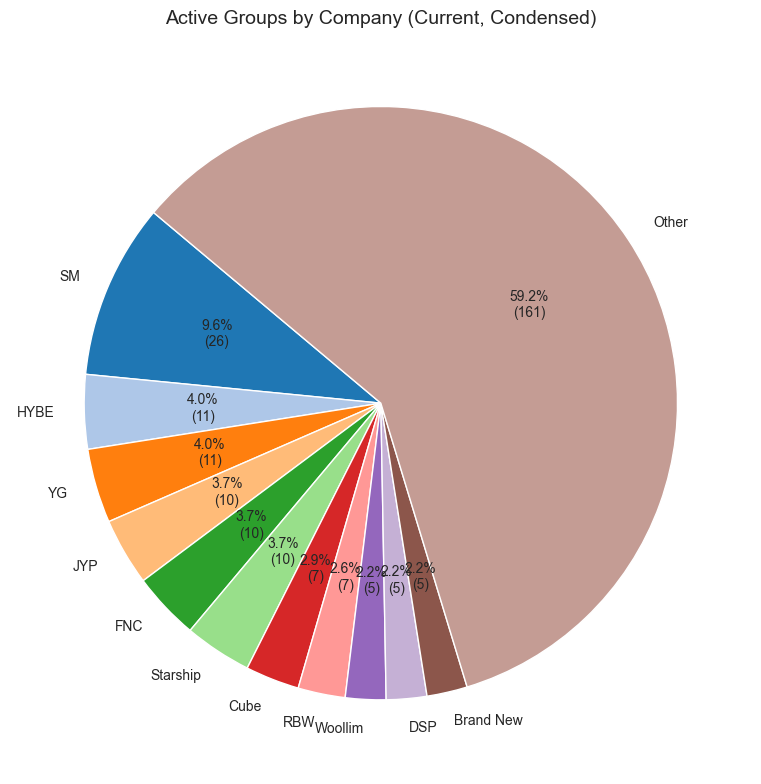

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme()
def plot_active_groups_pie_condensed(active_groups_by_company, min_percentage=2):
    """
    Plot a pie chart for active groups by company, combining small slices into 'Other'.
    
    Args:
        active_groups_by_company (pd.Series): Series with companies as index and counts as values.
        min_percentage (float): Minimum percentage to retain as separate slice. Others are grouped as 'Other'.
    """
    # Calculate total and filter out small slices
    total = active_groups_by_company.sum()
    percentage = (active_groups_by_company / total) * 100
    filtered = active_groups_by_company[percentage >= min_percentage]
    others = active_groups_by_company[percentage < min_percentage].sum()
    
    # Add 'Other' category
    filtered = pd.concat([filtered, pd.Series({'Other': others})])
    
    # Prepare data
    labels = filtered.index
    sizes = filtered.values
    total = sizes.sum()
    
    # Create pie chart
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        sizes,
        labels=labels,
        autopct=lambda p: f'{p:.1f}%\n({int(p * total / 100)})',
        startangle=140,
        colors=plt.cm.tab20.colors[:len(labels)]
    )
    
    # Adjust text size
    for text in texts + autotexts:
        text.set_fontsize(10)
    
    # Title
    plt.title("Active Groups by Company (Current, Condensed)", fontsize=14)
    plt.tight_layout()
    plt.show()

# Call the function with a minimum percentage threshold
plot_active_groups_pie_condensed(active_groups_by_company, min_percentage=2)

In [ ]:
# How many albums did each company release in each year after 2000?
# Extract the year and handle the incomplete release_date
def extract_release_year(date_str):
    """
    Extract the release year from a date string.
    Handles cases with full date (e.g., '2024-10-11') and year-only (e.g., '2020').
    
    Args:
        date_str (str): The release date string.
    
    Returns:
        int or None: The extracted year, or None if invalid.
    """
    try:
        return int(date_str[:4])
    except (ValueError, TypeError):
        return None


all_album_data['release_year'] = all_album_data['release_date'].apply(extract_release_year)
all_album_data['release_year']

0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
6233    2024
6234    2024
6235    2023
6236    2023
6237    2023
Name: release_year, Length: 6238, dtype: int64

In [266]:
top_companys = ['SM', 'HYBE', 'YG', 'JYP', 'FNC', 'Startship', 'Cube']

In [ ]:
# Filter out albums after 2000 and count the number of albums by year and company
albums_by_year_company = all_album_data[all_album_data['release_year'] > 2000] \
    .merge(artist_merged_df[['id', 'bg_company_standardized']], left_on='artist_id', right_on='id')
    # .groupby(['release_year', 'bg_company_standardized'])['id'].count()
albums_by_year_company = albums_by_year_company.groupby(['release_year', 'bg_company_standardized'])['id_x'].count()
albums_by_year_company

release_year  bg_company_standardized
2001          DSP                         1
              Star Empire                 1
2002          Star Empire                 1
2003          &NEW                        1
2004          &NEW                        2
                                         ..
2024          WM                          4
              WakeOne                    13
              Woollim                     5
              YG                         16
              Yuehua                      8
Name: id_x, Length: 732, dtype: int64

In [ ]:
albums_by_year_top_companies = albums_by_year_company.reset_index()
albums_by_year_top_companies = albums_by_year_company[
    albums_by_year_company.index.get_level_values('bg_company_standardized').isin(top_companys)
]
albums_by_year_top_companies

release_year  bg_company_standardized
2004          SM                          4
2005          SM                          5
2006          SM                          5
              YG                          4
2007          JYP                         4
                                         ..
2024          FNC                        10
              HYBE                       47
              JYP                        21
              SM                         39
              YG                         16
Name: id_x, Length: 106, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_36836\528909385.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


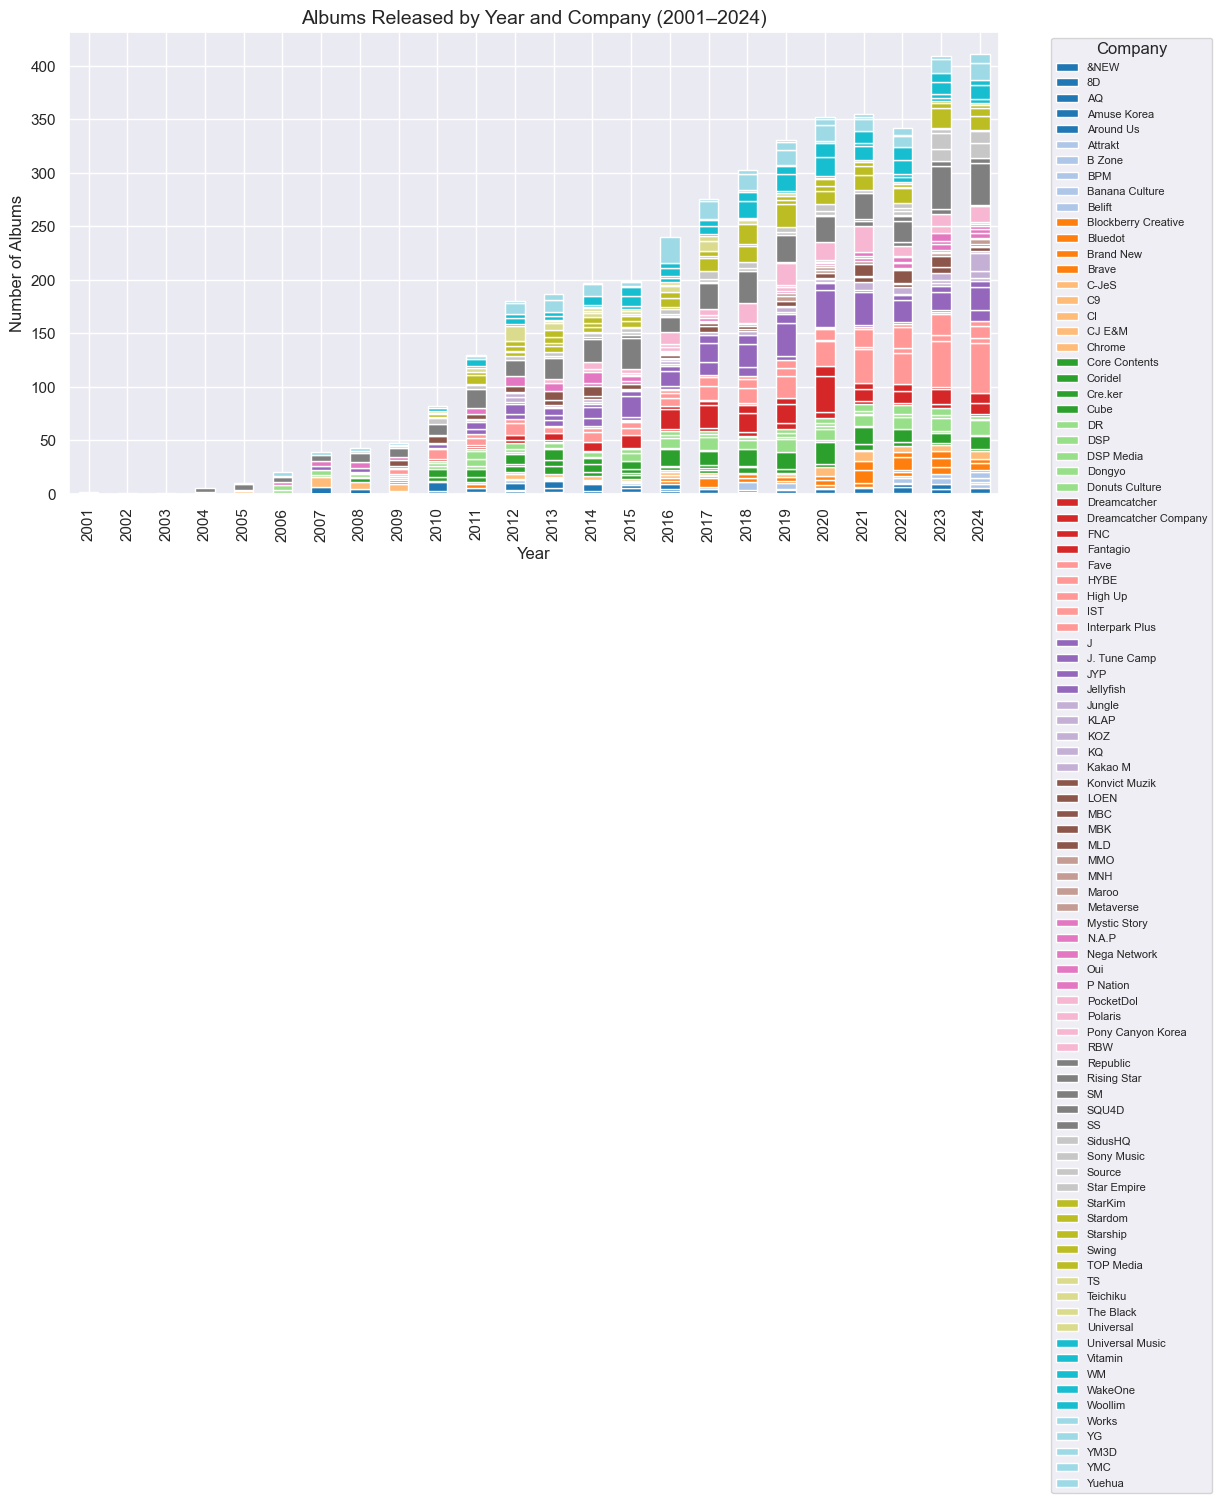

In [ ]:
albums_pivot = albums_by_year_company.unstack(fill_value=0)

albums_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title('Albums Released by Year and Company (2001–2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Albums', fontsize=12)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

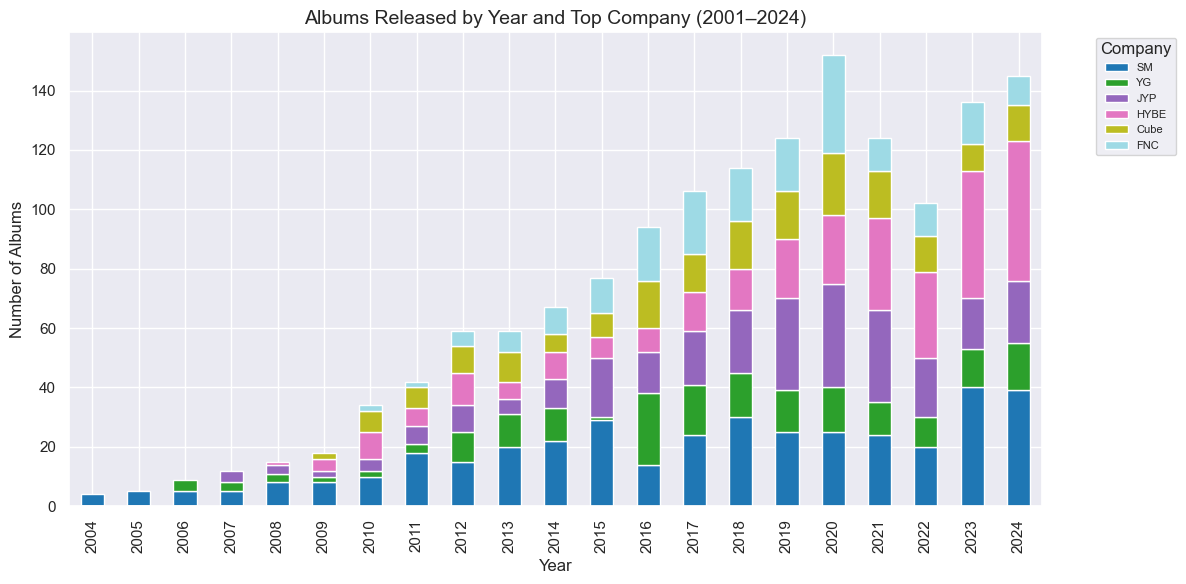

In [ ]:
albums_pivot = albums_by_year_top_companies.unstack(fill_value=0)

albums_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title('Albums Released by Year and Top Company (2001–2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Albums', fontsize=12)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

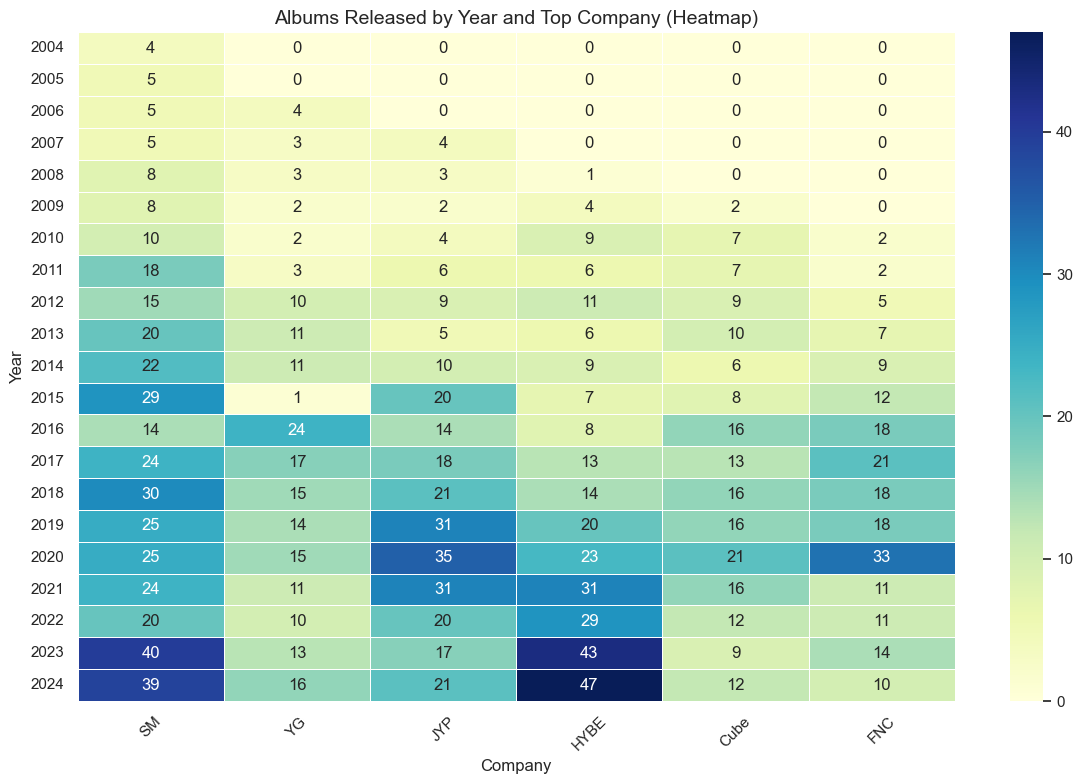

In [ ]:
albums_heatmap_data = albums_by_year_top_companies.unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(albums_heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Albums Released by Year and Top Company (Heatmap)', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# How many albums did each company release in each year after 2000 / The number of active groups in that company that year
# Ensure 'bg_start_year' and 'bg_end_year' are numeric types and handle None or non-numbers
artist_merged_df['bg_start_year'] = pd.to_numeric(artist_merged_df['bg_start_year'], errors='coerce')
artist_merged_df['bg_end_year'] = pd.to_numeric(artist_merged_df['bg_end_year'], errors='coerce')


years = range(2020, 2025)
results = []

for year in years:
    # Calculate the number of activity groups in the current year
    active_groups = artist_merged_df[
        (artist_merged_df['bg_start_year'] <= year) & # Already debuted
        ((artist_merged_df['bg_end_year'].isna()) | # Not yet dissolved
        (artist_merged_df['bg_end_year'] >= year)) # Dissolution year >= current year
    ].groupby('bg_company_standardized')['name'].count()
    
    # Calculate the number of albums in the current year
    albums_by_year = all_album_data[all_album_data['release_year'] == year].merge(
        artist_merged_df[['id', 'bg_company_standardized']], left_on='artist_id', right_on='id').groupby('bg_company_standardized')['id_x'].count()
    
    # Calculate the number of albums/number of active groups
    albums_per_active_group = albums_by_year / active_groups
    albums_per_active_group = albums_per_active_group.fillna(0) # Avoid NaN
    
    # Save results
    results.append({
    'year': year,
    'albums_per_active_group': albums_per_active_group
    })


albums_by_year_company_avg_group_df = pd.DataFrame({
    'year': [year for result in results for year in [result['year']] * len(result['albums_per_active_group'])],
    'bg_company': [company for result in results for company in result['albums_per_active_group'].index],
    'albums_per_active_group': [value for result in results for value in result['albums_per_active_group'].values]
})
albums_by_year_company_avg_group_df

,year,bg_company,albums_per_active_group
0,2020,&NEW,1.000000
1,2020,8D,4.000000
2,2020,AQ,0.000000
3,2020,Amoeba Culture,0.000000
4,2020,Apple of the Eye,0.000000
...,...,...,...
491,2024,Works,0.000000
492,2024,YG,1.454545
493,2024,YM3D,0.000000
494,2024,Yedang,0.000000


In [286]:
albums_by_year_top_company_avg_group_df = albums_by_year_company_avg_group_df[albums_by_year_company_avg_group_df['bg_company'].isin(top_companys)]

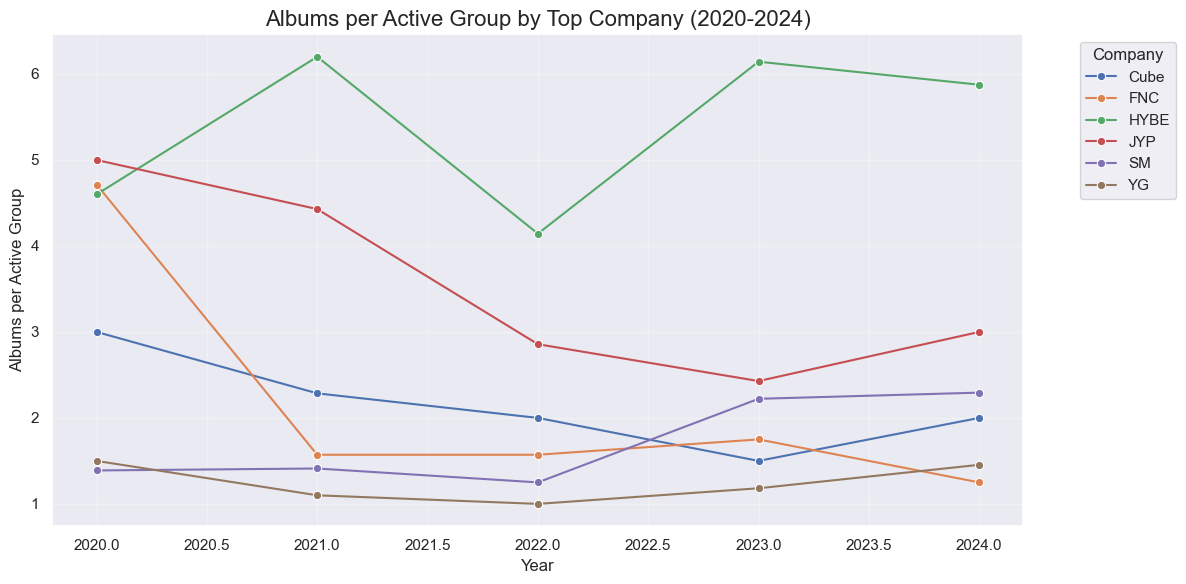

In [ ]:
filtered_df = albums_by_year_top_company_avg_group_df[albums_by_year_top_company_avg_group_df['albums_per_active_group'] > 0]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered_df,
    x='year',
    y='albums_per_active_group',
    hue='bg_company',
    marker='o'
)

plt.title('Albums per Active Group by Top Company (2020-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Albums per Active Group', fontsize=12)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

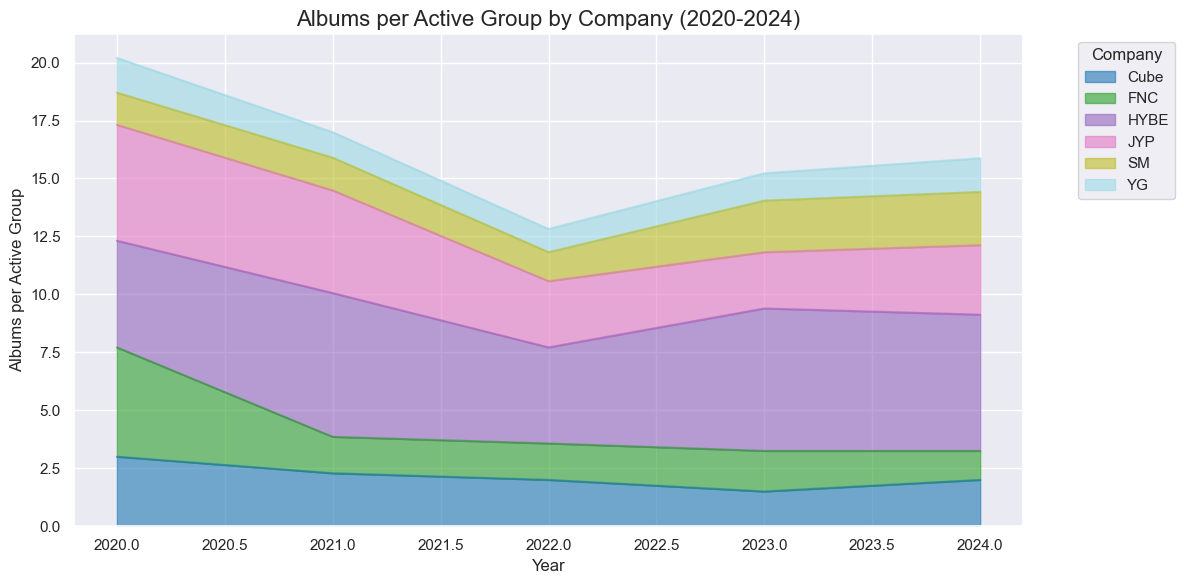

In [ ]:
pivot_df = filtered_df.pivot(index='year', columns='bg_company', values='albums_per_active_group').fillna(0)
pivot_df.plot.area(
    figsize=(12, 6),
    alpha=0.6,
    colormap='tab20'
)

plt.title('Albums per Active Group by Company (2020-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Albums per Active Group', fontsize=12)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

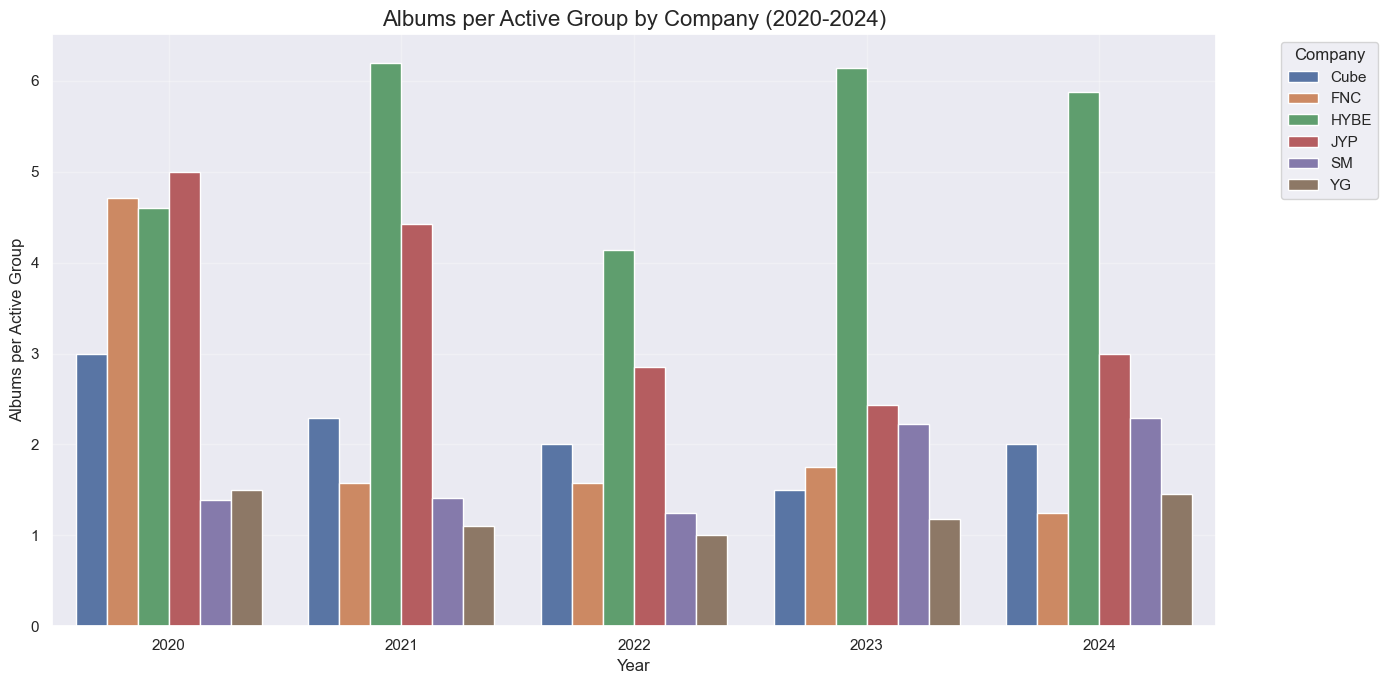

In [ ]:
# Plot bar chart
plt.figure(figsize=(14, 7))
sns.barplot(
    data=filtered_df,
    x='year',
    y='albums_per_active_group',
    hue='bg_company',
    dodge=True
)

plt.title('Albums per Active Group by Company (2020-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Albums per Active Group', fontsize=12)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# The year each group debuted vs. how many albums they released, who are the top 10 model workers?
group_album_count = all_album_data.groupby('artist_id')['id'].count() \
    .reset_index(name='album_count') \
    .merge(artist_merged_df[['id', 'name', 'bg_start_year']], left_on='artist_id', right_on='id') \
    .sort_values(by='album_count', ascending=False)
    
group_album_count

,artist_id,album_count,id,name,bg_start_year
126,2dIgFjalVxs4ThymZ67YCE,69,2dIgFjalVxs4ThymZ67YCE,Stray Kids,2017.0
229,4z6yrDz5GfKXkeQZjOaZdq,65,4z6yrDz5GfKXkeQZjOaZdq,DAVICHI,2008.0
212,4TnGh5PKbSjpYqpIdlW5nz,64,4TnGh5PKbSjpYqpIdlW5nz,MONSTA X,2015.0
165,3Nrfpe0tUJi4K4DXYWgMUX,60,3Nrfpe0tUJi4K4DXYWgMUX,BTS,2013.0
346,7n2Ycct7Beij7Dj7meI4X0,60,7n2Ycct7Beij7Dj7meI4X0,TWICE,2015.0
...,...,...,...,...,...
50,1E9Grth4BtkGuX16ppAVyb,1,1E9Grth4BtkGuX16ppAVyb,Geenius,2024.0
290,6E7TbMh8kSKJBr2zA1omRB,1,6E7TbMh8kSKJBr2zA1omRB,HI SUHYUN,2014.0
289,6C4irZ60X8G7UimMRQiCcg,1,6C4irZ60X8G7UimMRQiCcg,X1,2019.0
306,6XTJcgSOtX7zGavi7EOazp,1,6XTJcgSOtX7zGavi7EOazp,4TEN,2014.0


In [300]:
group_album_count['debut_years'] = group_album_count['bg_start_year'].apply(lambda year: 2025 - year if year else None)
group_album_count['avg_album_count'] = group_album_count['album_count'] / group_album_count['debut_years']
group_album_count.sort_values('avg_album_count', ascending=False)

,artist_id,album_count,id,name,bg_start_year,debut_years,avg_album_count
209,4SpbR6yFEvexJuaBpgAU5p,29,4SpbR6yFEvexJuaBpgAU5p,LE SSERAFIM,2022.0,3.0,9.666667
133,2jOm3cYujQx6o1dxuiuqaX,18,2jOm3cYujQx6o1dxuiuqaX,RIIZE,2023.0,2.0,9.000000
49,1Do4bSzfUl0KWL9r1fITu0,36,1Do4bSzfUl0KWL9r1fITu0,YOON MIRAE,2021.0,4.0,9.000000
126,2dIgFjalVxs4ThymZ67YCE,69,2dIgFjalVxs4ThymZ67YCE,Stray Kids,2017.0,8.0,8.625000
262,5Z71xE9prhpHrqL5thVMyK,17,5Z71xE9prhpHrqL5thVMyK,tripleS,2023.0,2.0,8.500000
...,...,...,...,...,...,...,...
306,6XTJcgSOtX7zGavi7EOazp,1,6XTJcgSOtX7zGavi7EOazp,4TEN,2014.0,11.0,0.090909
17,0TZwYeCBGsOjdJXyFLNuaa,1,0TZwYeCBGsOjdJXyFLNuaa,2Yoon,2013.0,12.0,0.083333
235,54kFWyVNZETwrt78EUjGA1,1,54kFWyVNZETwrt78EUjGA1,A.cian (에이션),2012.0,13.0,0.076923
219,4gOc8TsQed9eqnqJct2c5v,4,4gOc8TsQed9eqnqJct2c5v,K/DA,NaN,NaN,NaN


C:\Users\user\AppData\Local\Temp\ipykernel_36836\538871.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


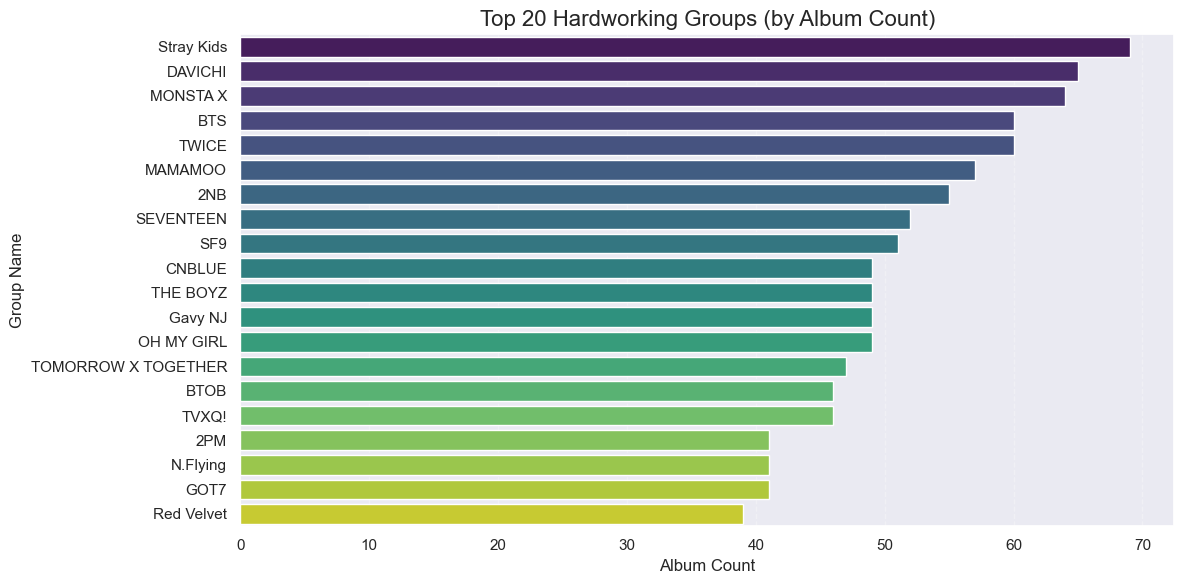

In [ ]:
top_20_groups = group_album_count.sort_values('album_count', ascending=False).head(20)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_20_groups,
    x='album_count',
    y='name',
    palette='viridis'
)

plt.title('Top 20 Hardworking Groups (by Album Count)', fontsize=16)
plt.xlabel('Album Count', fontsize=12)
plt.ylabel('Group Name', fontsize=12)
plt.grid(alpha=0.3, linestyle='--', axis='x')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_36836\4146273921.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


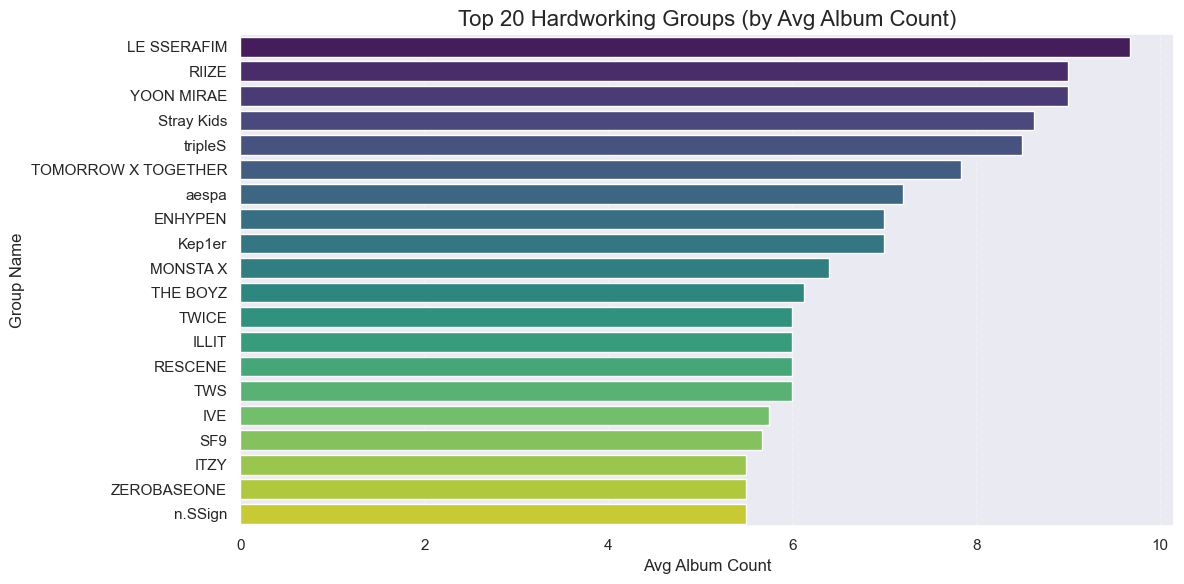

In [ ]:
top_20_groups = group_album_count.sort_values('avg_album_count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_20_groups,
    x='avg_album_count',
    y='name',
    palette='viridis'
)

plt.title('Top 20 Hardworking Groups (by Avg Album Count)', fontsize=16)
plt.xlabel('Avg Album Count', fontsize=12)
plt.ylabel('Group Name', fontsize=12)
plt.grid(alpha=0.3, linestyle='--', axis='x')
plt.tight_layout()
plt.show()

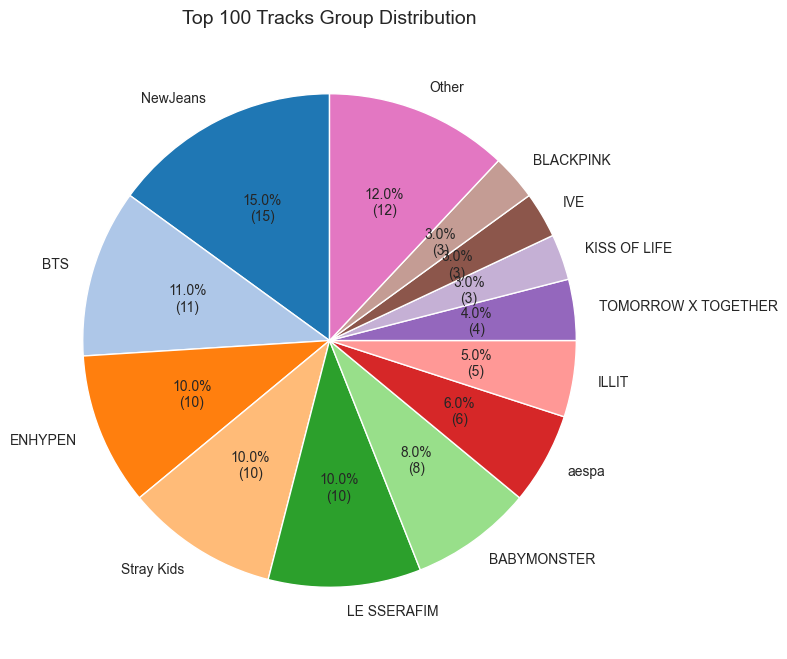

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter top 100 tracks
top_100_tracks = tracks_merged_df.sort_values(by='popularity', ascending=False).head(100)

# Expand artist_ids
expanded_tracks = top_100_tracks.explode('artist_ids')

# Use artist_ids to match the id of artist_merged_df to get group name
group_distribution = expanded_tracks.merge(
    artist_merged_df[['id', 'name', 'bg_company_standardized']],
    left_on='artist_ids',
    right_on='id',
    how='left'
)

# Count the number of times each group appears in the Top 100
group_counts = group_distribution['name_y'].value_counts()

# Filter out groups with too low frequency and classify them into "Other"
threshold = 3 # Groups with occurrences less than 3 are merged into "Other"
filtered_group_counts = group_counts[group_counts >= threshold]
others_count = group_counts[group_counts < threshold].sum()

# If there is "Other", add statistics
if others_count > 0:
    filtered_group_counts['Other'] = others_count

# Plot pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.tab20.colors
plt.pie(
    filtered_group_counts,
    labels=filtered_group_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(filtered_group_counts) / 100)})',
    colors=colors[:len(filtered_group_counts)], # Make sure the color is not out of range
    startangle=90,
    textprops={'fontsize': 10}
)
plt.title('Top 100 Tracks Group Distribution', fontsize=14)
plt.tight_layout()
plt.show()

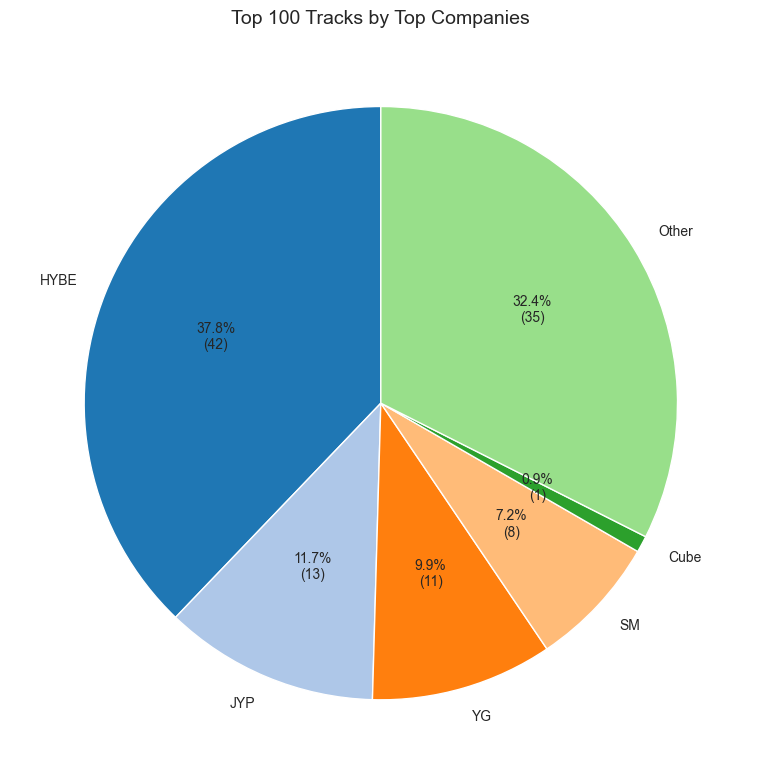

In [ ]:
top_company_tracks = group_distribution[group_distribution['bg_company_standardized'].isin(top_companys)]

# Count the number of songs in the Top 100 for each company
company_counts = top_company_tracks['bg_company_standardized'].value_counts()

# If necessary, count the number of non-top_company songs and merge them into "Other"
others_count = len(group_distribution) - len(top_company_tracks)
if others_count > 0:
    company_counts['Other'] = others_count

# Plot pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.tab20.colors
plt.pie(
    company_counts,
    labels=company_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(company_counts) / 100)})',
    colors=colors[:len(company_counts)],
    startangle=90,
    textprops={'fontsize': 10}
)
plt.title('Top 100 Tracks by Top Companies', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_36836\3470690177.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


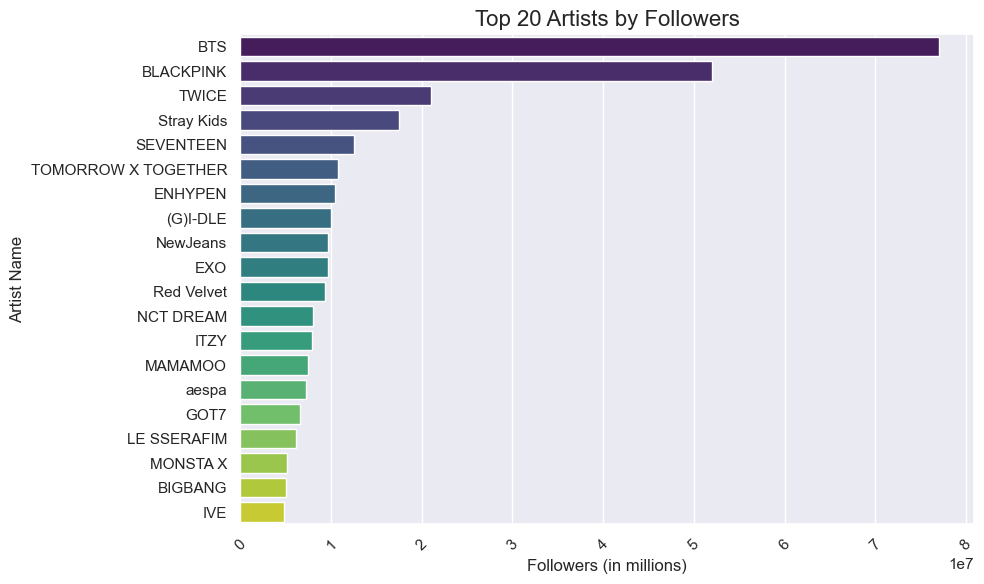

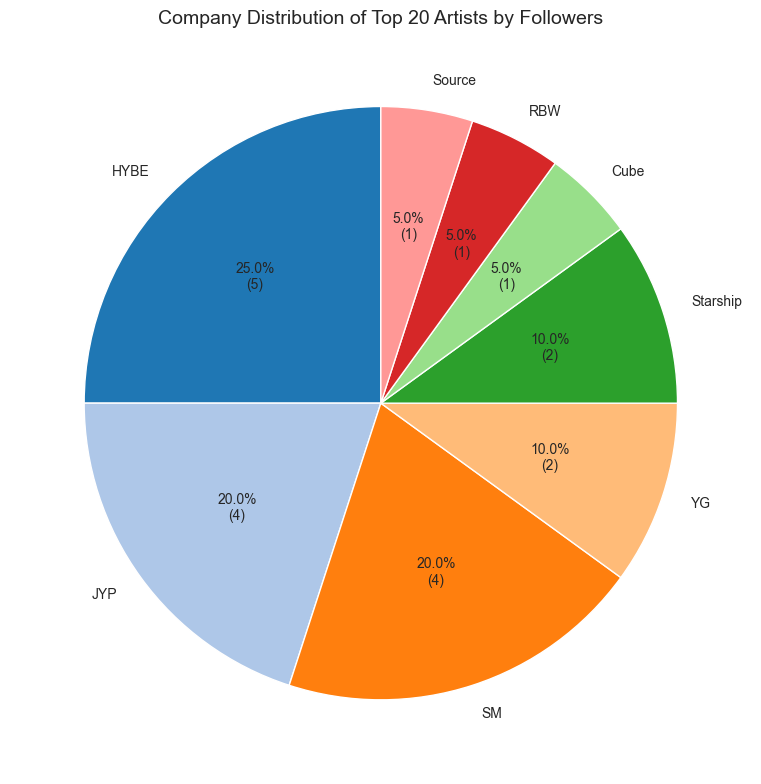

In [ ]:
# Select the top 20 artists with the most fans
top_20_followers = artist_merged_df.nlargest(20, 'followers')

# Visualization 1: Bar chart showing the number of followers of the top 20 artists
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_20_followers,
    x='followers',
    y='name',
    palette='viridis'
)
plt.title('Top 20 Artists by Followers', fontsize=16)
plt.xlabel('Followers (in millions)', fontsize=12)
plt.ylabel('Artist Name', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Visualization 2: A pie chart showing the distribution of companies owned by the top 20 artists
company_counts = top_20_followers['bg_company_standardized'].value_counts()

plt.figure(figsize=(8, 8))
colors = plt.cm.tab20.colors
plt.pie(
    company_counts,
    labels=company_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(company_counts)/100)})',
    colors=colors[:len(company_counts)],
    startangle=90,
    textprops={'fontsize': 10}
)
plt.title('Company Distribution of Top 20 Artists by Followers', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Who is the best model worker of each company every year?
filtered_album_data = all_album_data[all_album_data['release_year'] >= 2000]
group_yearly_album_count = filtered_album_data.groupby(['release_year', 'artist_id'])['id'].count() \
    .reset_index(name='album_count') \
    .merge(artist_merged_df[['id', 'name', 'bg_company_standardized']], left_on='artist_id', right_on='id')

best_performer_per_year = group_yearly_album_count.sort_values(by='album_count', ascending=False) \
    .groupby(['release_year', 'bg_company_standardized']).first()
best_performer_per_year

artist_id  album_count  \
release_year bg_company_standardized                                        
2001         DSP                      1Do4bSzfUl0KWL9r1fITu0            1   
             Star Empire              01iyQzyns6Ab0LxjYvHcg9            1   
2002         Star Empire              01iyQzyns6Ab0LxjYvHcg9            1   
2003         &NEW                     3MaRWfwKpbYnkYHC5gRKYo            1   
2004         &NEW                     3MaRWfwKpbYnkYHC5gRKYo            2   
...                                                      ...          ...   
2024         WM                       0eEhOgZ2x6kv8kLz77WO7b            2   
             WakeOne                  7cjg7EkeZy3OI5o9Qthc6n            9   
             Woollim                  5IVacR5tKgTu9HotcG8kkl            2   
             YG                       3KonOYiLsU53m4yT7gNotP            7   
             Yuehua                   1iyFL3CRuKW7PXgPH4VxSP            7   

                                                          id         name  
release_year bg_company_standardized                                       
2001         DSP                      1Do4bSzfUl0KWL9r1fITu0   YOON MIRAE  
             Star Empire              01iyQzyns6Ab0LxjYvHcg9      Jewelry  
2002         Star Empire              01iyQzyns6Ab0LxjYvHcg9      Jewelry  
2003         &NEW                     3MaRWfwKpbYnkYHC5gRKYo  M.C the Max  
2004         &NEW                     3MaRWfwKpbYnkYHC5gRKYo  M.C the Max  
...                                                      ...          ...  
2024         WM                       0eEhOgZ2x6kv8kLz77WO7b          ONF  
             WakeOne                  7cjg7EkeZy3OI5o9Qthc6n  ZEROBASEONE  
             Woollim                  5IVacR5tKgTu9HotcG8kkl      DRIPPIN  
             YG                       3KonOYiLsU53m4yT7gNotP     TREASURE  
             Yuehua                   1iyFL3CRuKW7PXgPH4VxSP      TEMPEST  

[732 rows x 4 columns]